Notebook to analyze raw, interim, and clean datasets

# Setup

In [5]:
import sys
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
proj_path = "/Users/aarontrefler_temp2/Documents/My_Documents/Kaggle/kaggle-gendered-pronoun/"
sys.path.insert(0, proj_path)

In [7]:
import src.utils as utils
import src.data.data_utils as data_utils
import src.models.bert_model_utils as bert_model_utils

In [8]:
%reload_ext autoreload
%autoreload 2

pd.options.display.max_columns = 20

In [9]:
bert_dir = proj_path + "bert/"
data_raw_dir = proj_path + "data/raw/"
data_interim_dir = proj_path + "data/interim/"
data_clean_dir = proj_path + "data/clean/"

# Analyze Raw Data

In [23]:
df_train = pd.read_csv(data_raw_dir + "gap-test.tsv", sep='\t')
df_valid = pd.read_csv(data_raw_dir + "gap-validation.tsv", sep='\t')
df_test = pd.read_csv(data_raw_dir + "gap-development.tsv", sep='\t')
df_testS2 = pd.read_csv(data_raw_dir + "gap-kaggleStage2.tsv", sep='\t')

In [24]:
utils.display_df(df_train, title="Train - GAP Test")
utils.display_df(df_valid, title="Validation - GAP Validation")
utils.display_df(df_test, title="Test - GAP Development")
utils.display_df(df_test, title="Test - GAP Development")
utils.display_df(df_testS2, title="Test - Stage 2")

Train - GAP Test:


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,test-1,Upon their acceptance into the Kontinental Hoc...,His,383,Bob Suter,352,False,Dehner,366,True,http://en.wikipedia.org/wiki/Jeremy_Dehner


(2000, 11)

Validation - GAP Validation:


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,validation-1,He admitted making four trips to China and pla...,him,256,Jose de Venecia Jr,208,False,Abalos,241,False,http://en.wikipedia.org/wiki/Commission_on_Ele...


(454, 11)

Test - GAP Development:


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...


(2000, 11)

Test - GAP Development:


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...


(2000, 11)

Test - Stage 2:


,ID,Text,Pronoun,Pronoun-offset,A,A-offset,B,B-offset,URL
0,000075809a8e6b062f5fb3c191a8ed52,"For the U.S. Under Secretary of State, see Luc...",she,310,Lucy Benson,59,Kerrie Taylor,160,http://en.wikipedia.org/wiki/Lucy_Benson


(12359, 9)

In [14]:
print(df_testS2.Text[0])

For the U.S. Under Secretary of State, see Lucy W. Benson. Lucy Benson is a fictional character from the long-running Channel 4 soap opera Hollyoaks, played by Kerrie Taylor between 1995--2000 and appeared in the shows first ever episode airing on the 23 October 1995. The character left five years later when she went travelling.


Num A Coref: 0.459
Num B Coref: 0.4275
Num Neither: 0.1135


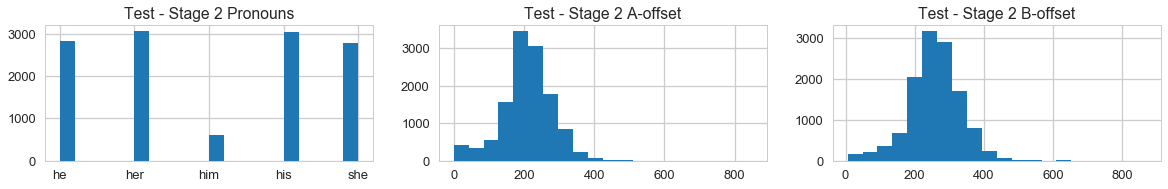

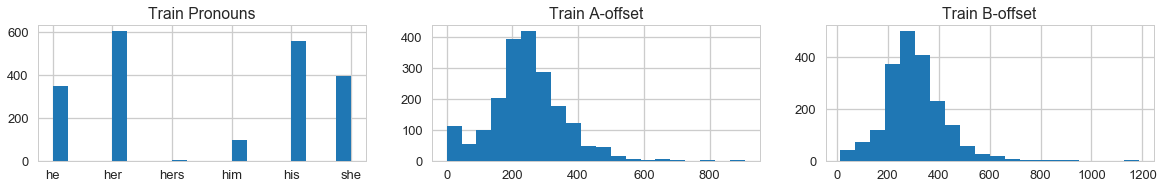

Num A Coref: 0.4118942731277533
Num B Coref: 0.45154185022026433
Num Neither: 0.13656387665198239


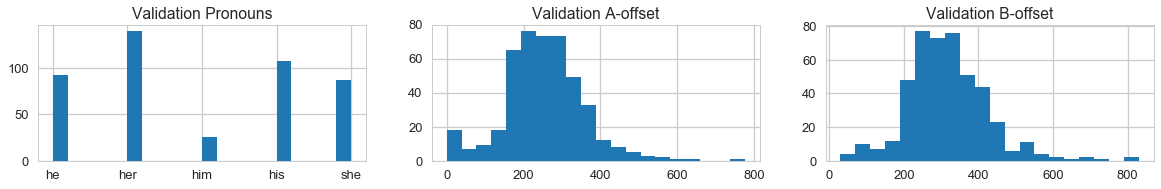

Num A Coref: 0.437
Num B Coref: 0.4625
Num Neither: 0.1005


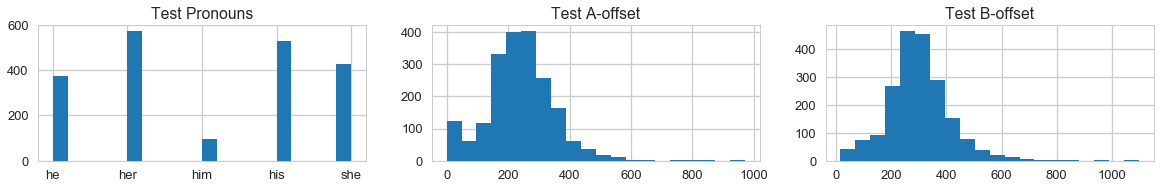

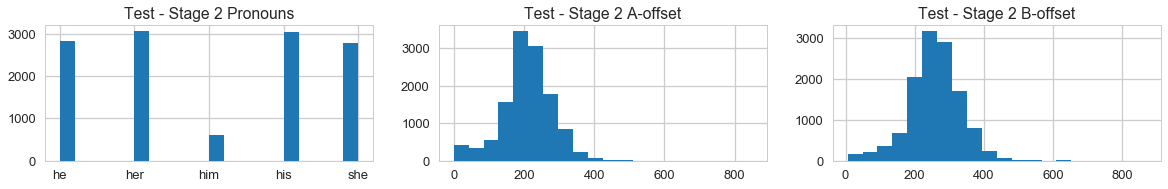

In [22]:
def describe_raw_data(df, dataset_name, labels=True):
    f, axes = plt.subplots(1, 3, figsize=(20, 2.5))
    
    df.Pronoun.str.lower().hist(bins=20, ax=axes[0])
    axes[0].set_title(dataset_name + " Pronouns")
    
    df['A-offset'].hist(bins=20, ax=axes[1])
    axes[1].set_title(dataset_name + " A-offset")
    
    df['B-offset'].hist(bins=20, ax=axes[2])
    axes[2].set_title(dataset_name + " B-offset")
    
    if labels:
        n = len(df)
        num_A = np.sum(df['A-coref'])
        num_B = np.sum(df['B-coref'])
        print("Num A Coref: {num}".format(num=(num_A) / n))
        print("Num B Coref: {num}".format(num=(num_B) / n))
        print("Num Neither: {num}".format(num=(n - num_A - num_B) / n))
    
    plt.show()
    

describe_raw_data(df_train, "Train")
describe_raw_data(df_valid, "Validation")
describe_raw_data(df_test, "Test")
describe_raw_data(df_testS2, "Test - Stage 2", labels=False)

# Analyze Interim Data

In [27]:
df_train_emb = pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_train.json", orient = 'columns')
df_valid_emb = pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_valid.json", orient = 'columns')
df_test_emb = pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_test.json", orient = 'columns')
df_testS2_emb = pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_testS2.json", orient = 'columns')

In [28]:
utils.display_df(df_train_emb, title="Train - GAP Test")
utils.display_df(df_valid_emb, title="Validation - GAP Validation")
utils.display_df(df_test_emb, title="Test - GAP Development")
utils.display_df(df_testS2_emb, title="Test - Kaggle Stage 2")

Train - GAP Test:


,emb_A,emb_B,emb_P,label
0,"[-0.145264, -0.3619263333, 0.526743, 0.0362323...","[-0.47775049999999997, -0.598545, 0.4266439999...","[-0.551684, -0.023438, -0.549022, -0.159332, 0...",B


(2000, 4)

Validation - GAP Validation:


,emb_A,emb_B,emb_P,label
0,"[0.0228178333, -0.4209143333, 0.7820245, 0.232...","[-0.3670055, -0.4148985, 0.5928515, 0.31750449...","[-0.123571, -0.16237000000000001, 0.040803, -0...",Neither


(454, 4)

Test - GAP Development:


,emb_A,emb_B,emb_P,label
0,"[0.7388775, -0.2271645, 0.1093035, -0.527125, ...","[0.385269, 0.024027999999999997, 0.90755000000...","[-0.008841, -0.9525579999999999, 0.113496, -0....",A


(2000, 4)

Test - Kaggle Stage 2:


,emb_A,emb_B,emb_P,label
0,"[0.319641, -0.4725985, 0.0447285, -0.449175999...","[-0.44353866670000003, -0.29683499999999996, 0...","[0.006914, -0.23075299999999999, 0.24737, -0.2...",NaN


(12359, 4)

In [29]:
# Read in and parse BERT word embedding json files
X_train, Y_train = bert_model_utils.parse_json(
    pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_train.json"))
X_valid, Y_valid = bert_model_utils.parse_json(
    pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_valid.json"))
X_test, Y_test = bert_model_utils.parse_json(
    pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_test.json"))
X_testS2, Y_testS2 = bert_model_utils.parse_json(
    pd.read_json(data_interim_dir + "bert_contextual_embeddings_gap_testS2.json"))

Number of examples with missing values: 1


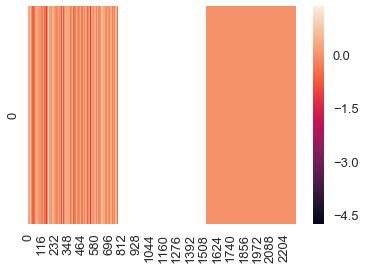

Number of examples with missing values: 0
Number of examples with missing values: 2


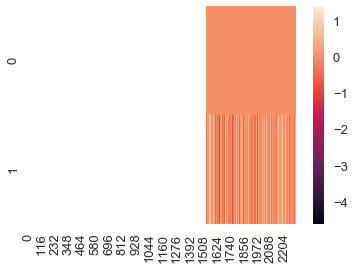

Number of examples with missing values: 10


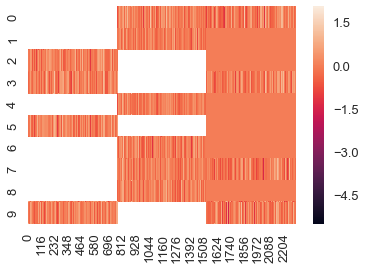

In [30]:
def describe_missing_values(X):
    nan_rows = [row for row in range(len(X)) if np.isnan(X[row]).sum()]
    
    print("Number of examples with missing values: {num}".format(num=len(nan_rows)))
    if len(nan_rows) > 0:
        sns.heatmap(X[nan_rows])
        plt.show()


describe_missing_values(X_train)
describe_missing_values(X_valid)
describe_missing_values(X_test)
describe_missing_values(X_testS2)

# Analyze Clean Data

In [31]:
X_train_clean = np.genfromtxt(data_clean_dir + "X_train.csv", delimiter=",")
X_valid_clean = np.genfromtxt(data_clean_dir + "X_valid.csv", delimiter=",")
X_test_clean = np.genfromtxt(data_clean_dir + "X_test.csv", delimiter=",")
X_testS2_clean = np.genfromtxt(data_clean_dir + "X_testS2.csv", delimiter=",")

Y_train_clean = np.genfromtxt(data_clean_dir + "Y_train.csv", delimiter=",")
Y_valid_clean = np.genfromtxt(data_clean_dir + "Y_valid.csv", delimiter=",")
Y_test_clean = np.genfromtxt(data_clean_dir + "Y_test.csv", delimiter=",")
Y_testS2_clean = np.genfromtxt(data_clean_dir + "Y_testS2.csv", delimiter=",")

In [38]:
def visualize_data(X, vmin=-4.5, vmax=4.5):
    sns.heatmap(X, vmin=vmin, vmax=vmax)
    plt.show()

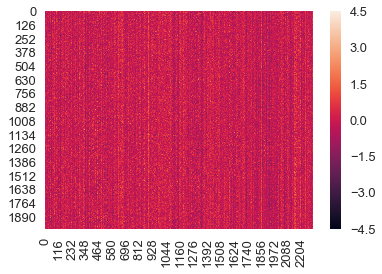

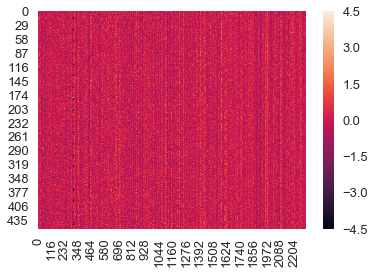

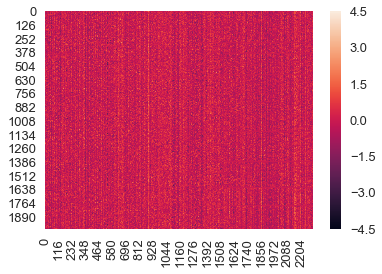

In [68]:
visualize_data(X_train_clean)
visualize_data(X_valid_clean)
visualize_data(X_test_clean)

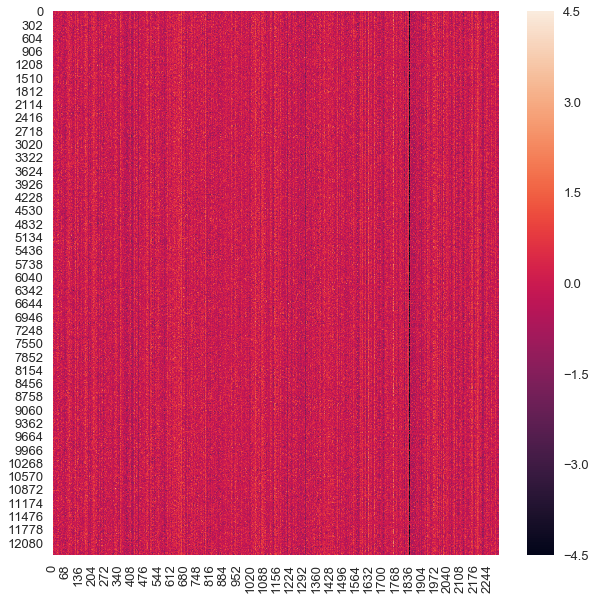

In [71]:
# Visualize Kaggle Stage 2 seperately, as special display settings are requried
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X_testS2_clean, vmin=-4.5, vmax=4.5, ax=ax)
plt.show()